In [14]:
import pandas as pd
import numpy as np
from datetime import datetime


pd.set_option('display.max_rows', 500)

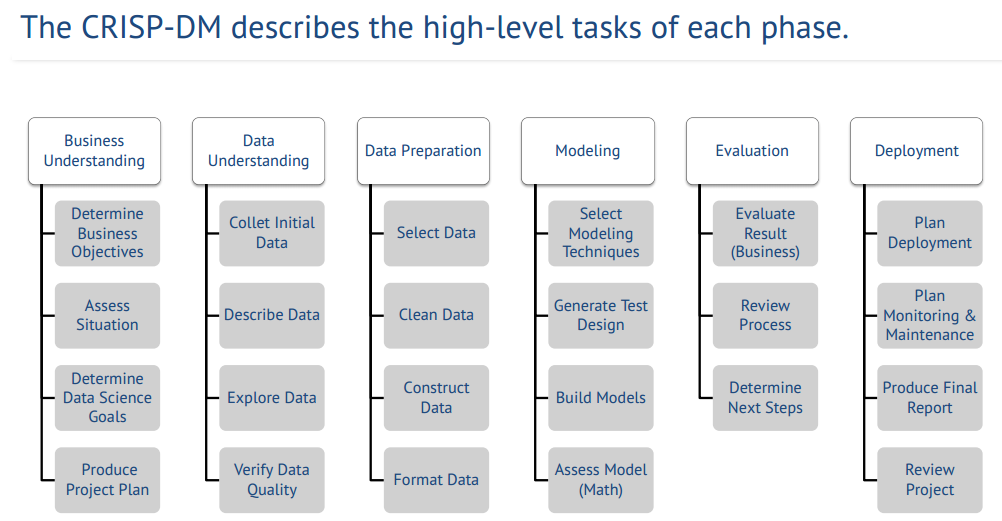

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GIT csv data

In [15]:
data_path = '/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path).copy()

In [16]:
def phase1():
    data_path = '/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    pd_raw = pd.read_csv(data_path).copy()
    pd_raw.drop(["Province/State"],axis=1,inplace=True) 

In [17]:
pd_raw.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/27/20', '7/28/20', '7/29/20', '7/30/20', '7/31/20', '8/1/20',
       '8/2/20', '8/3/20', '8/4/20', '8/5/20'],
      dtype='object', length=201)

In [18]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,907,907,918,922,925,925,925,937,939,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,950,1000,1078,1109,1148,1164,1199,1280,1344,1395


In [19]:
pd_raw.drop(["Province/State"],axis=1,inplace=True)

In [20]:
time_idx = pd_raw.columns[4:]

df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()


,date
0,1/23/20
1,1/24/20
2,1/25/20
3,1/26/20
4,1/27/20


In [21]:
test_df = pd.DataFrame([])

In [22]:
# See individual countries
p = list(pd_raw['Country/Region'].unique())


In [23]:
pd_raw[pd_raw['Country/Region'] == 'Australia'].iloc[:, 4::].sum()

1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        4
1/27/20        5
1/28/20        5
1/29/20        6
1/30/20        9
1/31/20        9
2/1/20        12
2/2/20        12
2/3/20        12
2/4/20        13
2/5/20        13
2/6/20        14
2/7/20        15
2/8/20        15
2/9/20        15
2/10/20       15
2/11/20       15
2/12/20       15
2/13/20       15
2/14/20       15
2/15/20       15
2/16/20       15
2/17/20       15
2/18/20       15
2/19/20       15
2/20/20       15
2/21/20       15
2/22/20       15
2/23/20       15
2/24/20       15
2/25/20       15
2/26/20       15
2/27/20       15
2/28/20       15
2/29/20       25
3/1/20        27
3/2/20        30
3/3/20        39
3/4/20        52
3/5/20        55
3/6/20        60
3/7/20        63
3/8/20        76
3/9/20        91
3/10/20      107
3/11/20      128
3/12/20      128
3/13/20      200
3/14/20      250
3/15/20      297
3/16/20      377
3/17/20      452
3/18/20      568
3/19/20      681
3/20/20      791
3/21/20     10

* Start analysis first in a small data sets to get a feeling on the data structures

In [11]:
np.array(pd_raw[pd_raw['Country/Region'] == "Australia"])

array([['Australia', -35.4735, 149.0124, ..., 113, 113, 113],
       ['Australia', -33.8688, 151.2093, ..., 3809, 3820, 3832],
       ['Australia', -12.4634, 130.8456, ..., 33, 33, 33],
       ...,
       ['Australia', -42.8821, 147.3272, ..., 229, 229, 229],
       ['Australia', -37.8136, 144.9631, ..., 12335, 13035, 13469],
       ['Australia', -31.9505, 115.8605, ..., 669, 670, 670]],
      dtype=object)

In [12]:
# country_list = ['Italy', 'US', 'Spain', 'Germany', 'Korea, South']
#country_list = p

In [13]:
# for each in country_list:
#     df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].sum()

SyntaxError: unexpected EOF while parsing (<ipython-input-13-6c19c6ad5772>, line 2)

In [ ]:
# df_plot["Germany"]

* Our first plot

In [ ]:
# %matplotlib inline
# df_plot.set_index('date').plot()

## Data Type : Date

In [ ]:
type(df_plot.date[0])

* first transform single date string to iso standards

In [ ]:
datetime.strptime(df_plot.date[0],"%m/%d/%y") 

In [ ]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] # convert to datetime

In [ ]:
time_str = [each.strftime('%Y-%m-%d') for each in time_idx] # convert ot ISO norm (str)
time_str[0:5]

In [ ]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

In [ ]:
df_plot.head()

In [ ]:
df_plot.to_csv('/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/processed/COVID_small_flat_table.csv', sep=';',index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes(columns) that uniquely specify a tuple(row) in a relation(table)

A primary key's main features are:
* It must contain a unique value for each row of data.
* It cannot contain null values

In [24]:
def make_relatinoal_data_struture():
    path_save='/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/processed/COVID_relational_confirmed.csv'
    data_path = '/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    pd_raw = pd.read_csv(data_path).copy()
    
    pd_data_base = pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})
    pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)
    
    test_pd = pd_data_base.set_index(['state', 'country']).T
    pd_relational_model =test_pd.stack(level=[0,1]).reset_index().rename(columns=                                             {'level_0':'date',0:'confirmed'})
    pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')
    pd_relational_model.to_csv(path_save, sep=';')

In [25]:
phase1()

In [26]:
data_path = '/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path).copy()
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,907,907,918,922,925,925,925,937,939,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,950,1000,1078,1109,1148,1164,1199,1280,1344,1395


In [27]:
# simple renaming: not necessary
pd_data_base = pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})

In [28]:
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,907,907,918,922,925,925,925,937,939,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,950,1000,1078,1109,1148,1164,1199,1280,1344,1395


In [29]:
# We don't need spatial location of countries for now
pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,907,907,918,922,925,925,925,937,939,939
4,NaN,Angola,0,0,0,0,0,0,0,0,...,950,1000,1078,1109,1148,1164,1199,1280,1344,1395


In [30]:
test_pd = pd_data_base.set_index(['state', 'country']).T

In [31]:
test_pd

state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [32]:
test_pd.columns

MultiIndex([(                           nan,           'Afghanistan'),
            (                           nan,               'Albania'),
            (                           nan,               'Algeria'),
            (                           nan,               'Andorra'),
            (                           nan,                'Angola'),
            (                           nan,   'Antigua and Barbuda'),
            (                           nan,             'Argentina'),
            (                           nan,               'Armenia'),
            ('Australian Capital Territory',             'Australia'),
            (             'New South Wales',             'Australia'),
            ...
            (                           nan,                'Malawi'),
            ( 'Falkland Islands (Malvinas)',        'United Kingdom'),
            (   'Saint Pierre and Miquelon',                'France'),
            (                           nan,           'South

In [33]:
pd_relational_model =test_pd.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',0:'confirmed'})

In [34]:
pd_relational_model.tail()

,date,state,country,confirmed
89039,8/5/20,Zhejiang,West Bank and Gaza,13065.0
89040,8/5/20,Zhejiang,Western Sahara,10.0
89041,8/5/20,Zhejiang,Yemen,1763.0
89042,8/5/20,Zhejiang,Zambia,7022.0
89043,8/5/20,Zhejiang,Zimbabwe,4221.0


In [35]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [36]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [37]:
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,NaN,Albania,0.0
2,2020-01-22,NaN,Algeria,0.0
3,2020-01-22,NaN,Andorra,0.0
4,2020-01-22,NaN,Angola,0.0


In [38]:
pd_relational_model.to_csv('/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/processed/COVID_relational_confirmed.csv', sep=';')

# Group-by apply

In [39]:
pd_JH_data = pd.read_csv('/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/processed/COVID_relational_confirmed.csv', sep=';', parse_dates=[0])
pd_JH_data = pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data = pd_JH_data.drop(['Unnamed: 0'], axis = 1).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cuba,0.0
2,2020-01-22,Zhejiang,Croatia,0.0
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,2020-01-22,Zhejiang,Costa Rica,0.0


In [40]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [41]:
test_data

,date,state,country,confirmed
26701,2020-03-21,Zhejiang,Germany,22213.0
26822,2020-03-21,Zhejiang,US,25825.0
26911,2020-03-21,NaN,Germany,22213.0
27031,2020-03-21,NaN,US,25825.0
27153,2020-03-22,Zhejiang,Germany,24873.0
...,...,...,...,...
88502,2020-08-04,NaN,US,4771080.0
88626,2020-08-05,Zhejiang,Germany,214113.0
88744,2020-08-05,Zhejiang,US,4823890.0
88834,2020-08-05,NaN,Germany,214113.0


In [42]:
test_data.groupby(['country']).agg([np.max]) # inner brackets important

,date,confirmed
,amax,amax
country,,
Germany,2020-08-05,214113.0
US,2020-08-05,4823890.0


In [43]:
# %load /media/sem/HDD/Home_Programming/Git/ads_covid-19-sem/src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept)

        parameters:
        ----------
        df_input : pandas.series
        column : str
        window : int
            used data points to calculate the filter result

        Returns:
        ----------
        df_result: pd.DataFrame
            the index of the df_input has to be preserved in result
    '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result




def calc_filtered_data(df_input,filter_on='confirmed'):
    '''  Calculate savgol filter and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    pd_filtered_result=df_input[['state','country',filter_on]].groupby(['state','country']).apply(savgol_filter).reset_index()
    df_output=pd.merge(df_input,pd_filtered_result[['index',filter_on+'_filtered']],on=['index'],how='left')

    return df_output





def calc_doubling_rate(df_input,filter_on='confirmed'):
    ''' Calculate approximated doubling rate and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()
    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    df_output=pd.merge(df_input,pd_DR_result[['index',filter_on+'_DR']],on=['index'],how='left')
    return df_output


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [44]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [45]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state     country       
Zhejiang  Germany  26701            NaN
                   27153            NaN
                   27605       7.417994
                   28059       7.142035
                   28510       8.012983
                   28962       6.954407
                   29413       6.501919
                   29865       7.390371
                   30317      10.136671
                   30769      13.541893
                   31221      13.781393
                   31673      13.140681
                   32125      12.037271
                   32578      12.735506
                   33031      16.052694
                   33483      21.372453
                   33934      27.427355
                   34386      27.511936
                   34838      21.792179
                   35289      21.495848
                   35741      26.565108
                   36194      36.198404
                   36646      43.982990
                   37098      49.423444
               

In [46]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [47]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})
pd_DR_result

,state,country,index,doubling_rate
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2158,NaN
...,...,...,...,...
52397,Zhejiang,Zimbabwe,87009,11.663727
52398,Zhejiang,Zimbabwe,87346,9.529255
52399,Zhejiang,Zimbabwe,87831,18.677885
52400,Zhejiang,Zimbabwe,88251,27.148889


In [48]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,1,2020-01-22,Zhejiang,Cuba,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0


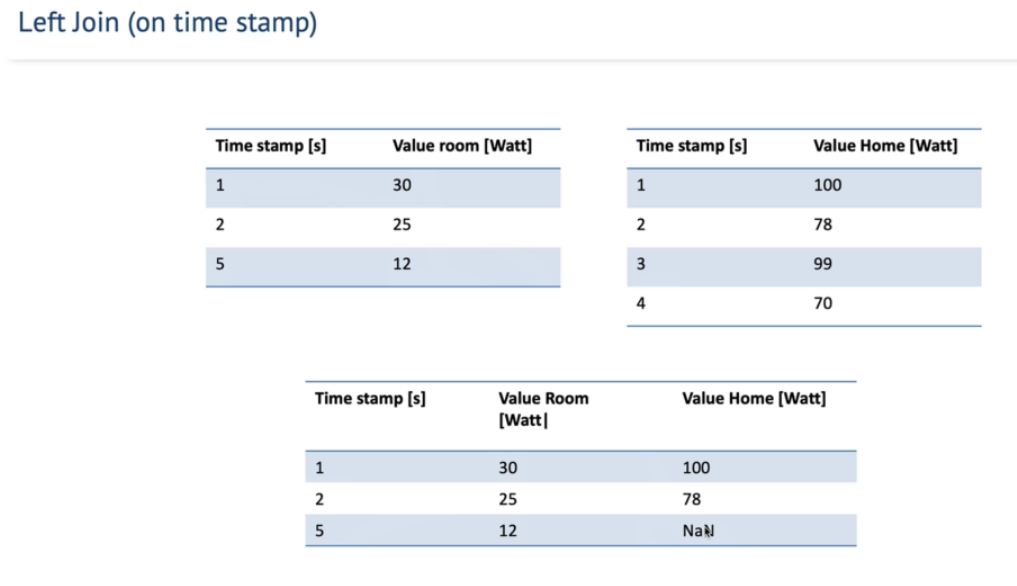

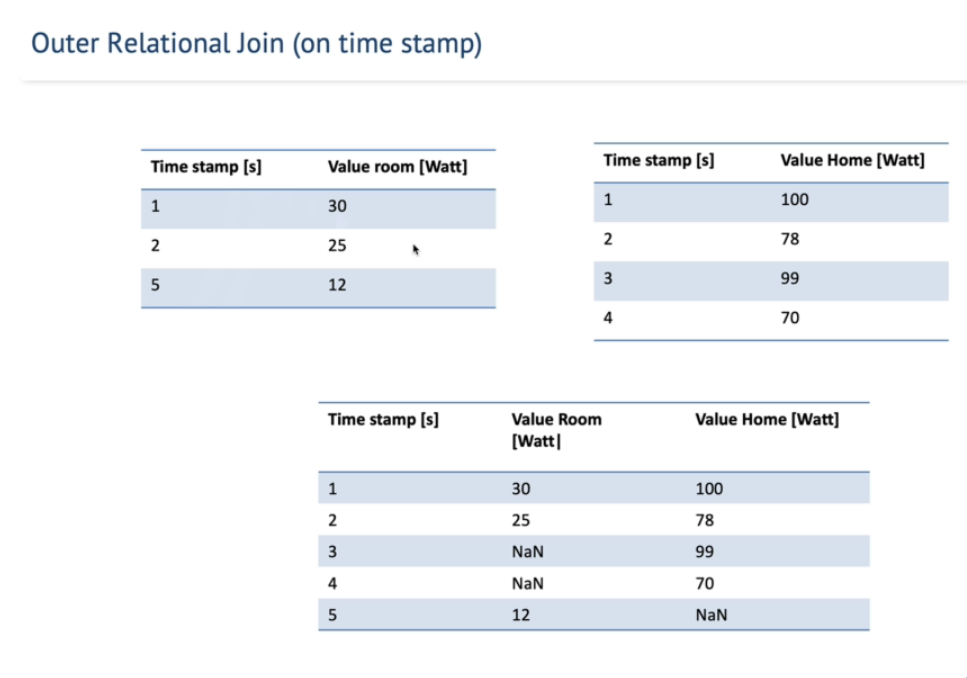

In [49]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')
pd_result_larg

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN
...,...,...,...,...,...,...
89039,89039,2020-08-05,NaN,San Marino,699.0,NaN
89040,89040,2020-08-05,NaN,Saint Vincent and the Grenadines,56.0,NaN
89041,89041,2020-08-05,NaN,Saint Lucia,25.0,NaN
89042,89042,2020-08-05,NaN,Timor-Leste,25.0,NaN


## Filter the data with groupby appy

In [50]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [51]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [52]:
pd_filtered_result

,index,state,country,confirmed,confirmed_filtered
0,0,NaN,NaN,NaN,NaN
1,1,Zhejiang,Cuba,0.0,0.0
2,2,Zhejiang,Croatia,0.0,0.0
3,3,Zhejiang,Cote d'Ivoire,0.0,0.0
4,4,Zhejiang,Costa Rica,0.0,0.0
...,...,...,...,...,...
89039,89039,NaN,NaN,NaN,NaN
89040,89040,NaN,NaN,NaN,NaN
89041,89041,NaN,NaN,NaN,NaN
89042,89042,NaN,NaN,NaN,NaN


In [53]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0


## Filtered Doubling Rate

In [54]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'doubling_rate_filtered',
                             'level_2':'index'})

pd_filtered_doubling.head()

,state,country,index,doubling_rate_filtered
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1705,NaN
4,Alberta,Canada,2158,NaN


In [55]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','doubling_rate_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,NaN,0.0,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,NaN,0.0,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,NaN,0.0,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,NaN,0.0,NaN


In [56]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['doubling_rate_filtered']=pd_result_larg['doubling_rate_filtered'].where(mask, other=np.NaN) 

In [57]:
pd_result_larg.tail(500)

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,doubling_rate_filtered
88544,88544,2020-08-04,NaN,Peru,439890.0,NaN,NaN,NaN
88545,88545,2020-08-04,NaN,Paraguay,5852.0,NaN,NaN,NaN
88546,88546,2020-08-04,NaN,Papua New Guinea,114.0,NaN,NaN,NaN
88547,88547,2020-08-04,NaN,Panama,69424.0,NaN,NaN,NaN
88548,88548,2020-08-04,NaN,Pakistan,280461.0,NaN,NaN,NaN
88549,88549,2020-08-04,NaN,Oman,79159.0,NaN,NaN,NaN
88550,88550,2020-08-04,NaN,Norway,9362.0,NaN,NaN,NaN
88551,88551,2020-08-04,NaN,North Macedonia,11202.0,NaN,NaN,NaN
88552,88552,2020-08-04,NaN,Nigeria,44433.0,NaN,NaN,NaN
88553,88553,2020-08-04,NaN,Niger,1152.0,NaN,NaN,NaN


In [64]:
pd_result_larg.to_csv('../data/processed/COVID_final_set_.csv',sep=';',index=False)

In [65]:
pd_result_larg.date

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
89039    2020-08-05
89040    2020-08-05
89041    2020-08-05
89042    2020-08-05
89043    2020-08-05
Name: date, Length: 89044, dtype: object

In [66]:
path1 = '/mnt/368AE7F88AE7B313/Files_Programming/Git/ads_covid-19-sem/data/processed/COVID_final_set_.csv'

In [69]:
t = pd.read_csv(path1,sep=';')

In [74]:
len(t.country)

89044